<a href="https://colab.research.google.com/github/Ireneyou33/Model-Comparison-and-Forecasting-on-COVID-19/blob/master/30_Days_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout
import datetime as dt
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
from keras.models import load_model
from keras.models import model_from_json
from datetime import datetime, timedelta
import json
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df_conf=pd.read_csv("/content/drive/My Drive/ST494/project/Conf_new.csv")

# df_death=pd.read_csv("/content/drive/My Drive/ST494/project/Deaths.csv")
# df_recover=pd.read_csv("/content/drive/My Drive/ST494/project/Recovered.csv")

In [ ]:
date=df_conf.columns[4:]
for i in range(len(date)):
    date.values[i]=pd.to_datetime(date.values[i], format="%m/%d/%y")
print(len(date))

idx = int(len(date)*0.8)
print(idx)

169
135


In [ ]:
start_date=date[0]
r=1

### World Class

In [ ]:
df_worldclass=worldclass_dataframe(df_conf)

In [ ]:
model = NeuralNets(train=True, world=True, w=1)

With window size 1
Train Score: 599457984.00 MSE (24483.83 RMSE)
Test Score: 1077213184.00 MSE (32820.93 RMSE)


In [ ]:
df = NN_pred(model, world=True, w=1)
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08
Original Data,555.0,654.000000,941.000000,1434.000000,2118.000000,2927.000000,5578.000000,6166.000000,8234.000000,9927.000000,12038.000000,16787.000000,19887.000000,23898.000000,27643.000000,30802.000000,34395.000000,37129.000000,40159.000000,42768.000000,44810.000000,45228.000000,60381.000000,66908.00000,69050.00,71234.00,73269.000,75151.00000,75651.000000,76211.000000,76840.000000,78601.00000,78979.000000,79543.00000,80396.000000,81373.00000,82737.000000,84114.000000,86009.000000,88386.000000,...,6054857.0,6162409.0,6257605.0,6378415.0,6497803.0,6624740.0,6755603.0,6882801.0,6995060.0,7097285.0,7221627.0,7355652.0,7493766.0,7622860.0,7757197.0,7890618.0,8010255.0,8151659.0,8327794.0,8467721.0,8648529.0,8806084.0,8934624.0,9072483.0,9237825.0,9409002.0,9586894.0,9778240.0,9956354.0,10117985.0,10276558.0,10450456.0,10668149.0,10875852.0,11079351.0,11272923.0,11455621.0,11622965.0,11833815.0,12045624.0
Predicted Data,NaN,573.260376,674.317139,967.279541,1470.521606,2168.731934,2994.539062,5700.614258,6300.830078,8411.793945,10139.966797,12294.823242,17142.482422,20306.884766,24401.214844,28224.017578,31448.644531,35116.292969,37907.089844,41000.042969,43663.242188,45747.667969,46174.351562,61642.15625,68304.75,70491.25,72720.625,74797.90625,76719.007812,77229.390625,77801.023438,78443.09375,80240.679688,80626.53125,81202.242188,82072.96875,83070.265625,84462.609375,85868.210938,87802.585938,...,6049112.5,6180654.5,6290440.5,6387614.5,6510934.5,6632803.0,NaN,6895958.5,7025799.0,7140390.0,7244739.0,7371664.5,7508474.0,7649457.5,7781233.0,7918361.5,8054554.5,8176676.5,8321018.0,8500812.0,8643646.0,8828210.0,8989039.0,9120249.0,9260973.0,9429749.0,9604482.0,9786070.0,9981391.0,10163206.0,10328195.0,10490062.0,10667572.0,10889789.0,11101807.0,11309533.0,11507127.0,11693620.0,11864441.0,12079671.0


In [ ]:
w=1
forecast_days=30

In [ ]:
worldNN_forecast30_w1 = LSTM_forecast(df, model, forecast_days=forecast_days, w=w, r=1)
worldNN_forecast30_w1.to_csv('worldNN_forecast30_w1.csv', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


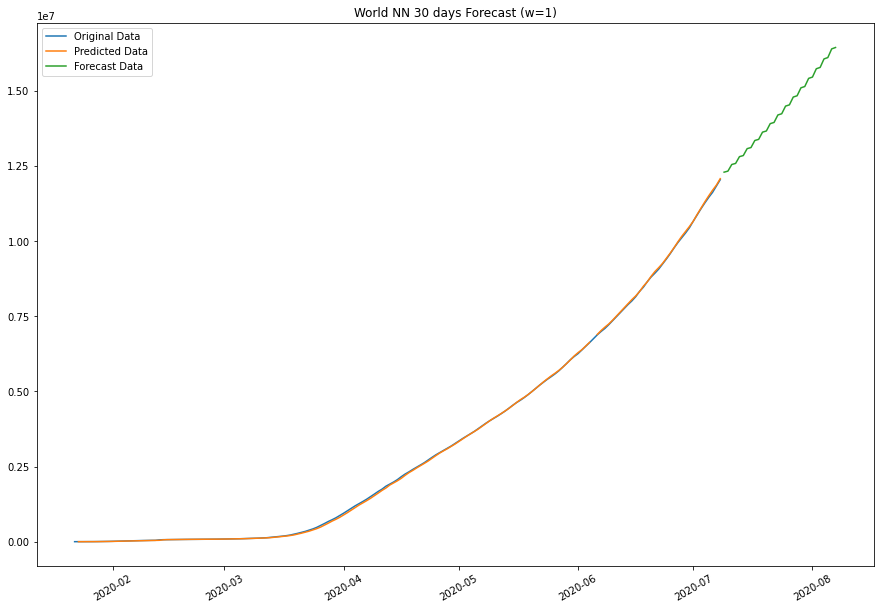

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.plot(worldNN_forecast30_w1.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("World NN 30 days Forecast (w=1)")
plt.show()

### China

In [ ]:
df_china, _, _ = sum_regioncase(df_conf, "China", region_level="county")
w=1
forecast_days=30

In [ ]:
model = LSTM_model(train=True, world=False, country="China", w=w)

With window size 1
Train Score: 3040338.00 MSE (1743.66 RMSE)
Test Score: 135702.89 MSE (368.38 RMSE)


In [ ]:
df = LSTM_pred(model, world=False, country="China", w=w)
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08
Original Data,548.0,643.000000,920.000000,1406.000000,2075.000000,2877.000000,5509.000000,6087.000000,8141.000000,9802.000000,11891.000000,16630.000000,19716.000000,23707.000000,27440.000000,30587.000000,34110.000000,36814.000000,39829.00000,42354.000000,44386.000000,44759.000000,59895.000000,66358.000000,68413.000000,70513.000000,72434.000,74211.0,74619.000000,75077.000000,75550.000000,77001.000000,77022.000000,77241.0000,77754.000000,78166.0000,78600.00000,78928.000000,79356.000000,79932.00000,...,84128.000000,84146.000000,84154.00000,84161.000,84160.000000,84171.00000,84177.0,84186.000000,84191.00000,84195.000000,84198.0000,84209.000000,84216.000000,84228.000000,84286.00000,84335.000000,84378.00000,84422.000000,84458.000000,84494.00000,84494.000000,84553.000000,84572.00000,84624.000000,84653.000000,84673.0000,84701.00000,84725.00000,84743.000000,84757.00000,84780.00000,84785.000000,84816.000000,84830.0000,84838.00,84857.00000,84871.000,84889.0000,84917.000000,84950.00000
Predicted Data,NaN,551.461975,646.900818,925.180298,1413.425171,2085.515137,2891.219727,5535.376465,6116.046387,8179.533203,9848.205078,11946.854492,16707.744141,19807.998047,23817.431641,27567.673828,30729.208984,34268.480469,36984.96875,40013.898438,42550.554688,44591.945312,44966.667969,60172.582031,66665.429688,68729.921875,70839.625,72769.5,74554.703125,74964.585938,75424.703125,75899.890625,77357.585938,77378.6875,77598.703125,78114.0625,78527.96875,78963.976562,79293.484375,79723.46875,...,84512.484375,84517.507812,84535.59375,84543.625,84550.664062,84549.65625,NaN,84566.734375,84575.78125,84580.796875,84584.8125,84587.828125,84598.882812,84605.914062,84617.96875,84676.234375,84725.46875,84768.664062,84812.867188,84849.03125,84885.203125,84885.203125,84944.46875,84963.554688,85015.796875,85044.9375,85065.03125,85093.15625,85117.265625,85135.34375,85149.40625,85172.515625,85177.546875,85208.6875,85222.75,85230.78125,85249.875,85263.9375,85282.023438,85310.15625


In [ ]:
chinaLSTM_forecast30_w1 = LSTM_forecast(df, model, forecast_days=forecast_days, w=w, r=1)
chinaLSTM_forecast30_w1.to_csv('chinaLSTM_forecast30_w1.csv', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


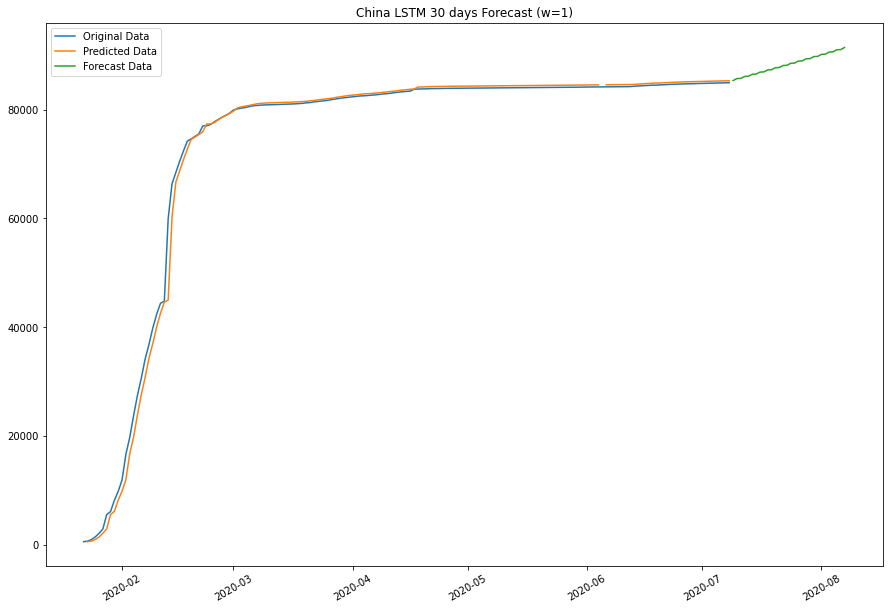

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df.iloc[0])
plt.plot(df.iloc[1])
plt.plot(chinaLSTM_forecast30_w1.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("China LSTM 30 days Forecast (w=1)")
plt.show()

### Canada

In [ ]:
df_canada, _, _ = sum_regioncase(df_conf, "Canada", region_level="county")
w=1
forecast_days=30

In [ ]:
model3 = LSTM_model(train=True, world=False, country="Canada", w=w)

With window size 1
Train Score: 404521.19 MSE (636.02 RMSE)
Test Score: 1886910.00 MSE (1373.65 RMSE)


In [ ]:
df3 = LSTM_pred(model3, world=False, country="Canada", w=w)
df3

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08
Original Data,0.0,0.000000,0.000000,0.000000,1.000000,1.00000,2.00000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,10.000000,11.000000,11.00000,13.00000,14.000000,20.000000,24.000000,...,91681.000,92479.0000,93288.0000,93960.000000,94641.000000,95269.0,95947.0,96475.00000,97178.000000,97779.000000,98241.000000,98720.000000,99159.000000,99595.000000,100043.000000,100404.000,100763.00000,101087.000000,101491.00000,101877.000000,102314.000000,102762.00000,103078.000000,103418.000000,103767.000000,104087.000000,104463.000000,104629.000000,104878.0000,105193.000000,105830.000000,106097.00,106288.000000,106643.0,106962.0,107185.000000,107394.000000,107815.000000,108023.000000,108334.000000
Predicted Data,NaN,0.475979,0.475979,0.475979,0.475979,0.87639,0.87639,1.352371,1.352371,1.352371,2.566542,2.566542,2.566542,2.566542,2.566542,3.222288,3.222288,4.535247,4.535247,4.535247,4.535247,4.535247,4.535247,4.535247,4.535247,4.535247,4.535247,5.159885,5.159885,5.159885,5.159885,5.773284,5.773284,5.773284,6.398018,7.03578,7.03578,8.271895,8.898726,12.764226,...,92447.875,93232.9375,94044.4375,94867.117188,95550.484375,96243.0,NaN,97571.09375,98108.015625,98822.914062,99434.078125,99903.890625,100390.992188,100837.414062,101280.789062,101736.375,102103.46875,102468.546875,102798.03125,103208.859375,103601.390625,104045.78125,104501.359375,104822.703125,105168.453125,105523.359375,105848.765625,106231.132812,106399.9375,106653.140625,106973.476562,107621.25,107892.765625,108087.0,108448.0,108772.398438,108999.171875,109211.703125,109639.828125,109851.335938


In [ ]:
canadaLSTM_forecast30_w1 = LSTM_forecast(df3, model3, forecast_days=forecast_days, w=w, r=1)
canadaLSTM_forecast30_w1.to_csv('canadaLSTM_forecast30_w1.csv', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


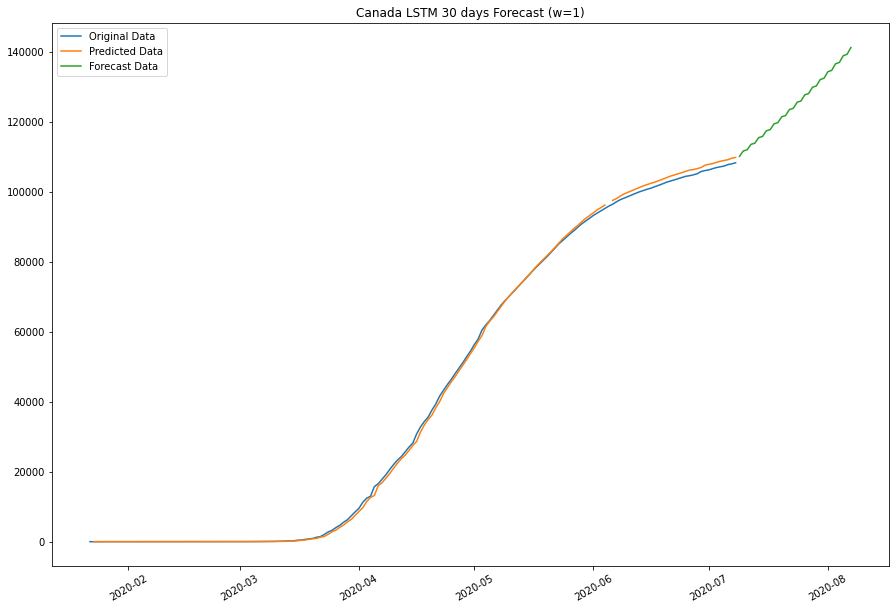

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.plot(canadaLSTM_forecast30_w1.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("Canada LSTM 30 days Forecast (w=1)")
plt.show()

### Italy

In [ ]:
df_italy, _, _ = sum_regioncase(df_conf, "Italy", region_level="county")
w=5
forecast_days=30

In [ ]:
model3 = NeuralNets(train=True, world=False, country="Italy", w=w)

With window size 5
Train Score: 1877289.88 MSE (1370.14 RMSE)
Test Score: 541757.88 MSE (736.04 RMSE)


In [ ]:
df3 = NN_pred(model3,world=False, country="Italy", w=w)
df3

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08
Original Data,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.00000,0.00000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.00000,3.00000,3.000000,3.000000,3.000000,3.000000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,20.00000,62.000000,155.000000,229.000000,322.000000,453.000000,655.000000,888.00000,1128.000000,1694.000000,...,232664.00000,232997.00000,233197.000000,233515.000000,233836.0000,234013.000000,234531.0,234801.0,234998.0,235278.0,235561.0,235763.000000,236142.000000,236305.000000,236651.000000,236989.000000,237290.000000,237500.000000,237828.000000,238159.00000,238011.000000,238275.000000,238499.00000,238720.00000,238833.000000,239410.000000,239706.000000,239961.000000,240136.000000,240310.000000,240436.00000,240578.0,240760.0000,240961.000,241184.00000,241419.000000,241611.000000,241819.00000,241956.000000,242149.000000
Predicted Data,NaN,NaN,NaN,NaN,NaN,7.12483,7.12483,7.12483,7.12483,7.12483,8.411227,8.867603,8.953428,9.138295,9.66351,9.66351,9.66351,10.306708,10.534896,10.577808,10.670242,10.93285,10.93285,10.93285,10.93285,10.93285,10.93285,10.93285,10.93285,10.93285,10.93285,21.867226,52.760765,122.891632,195.083466,284.124237,412.406097,607.47821,837.088196,1089.823242,...,233351.78125,233793.65625,234090.984375,234268.859375,234442.1875,234761.484375,NaN,NaN,NaN,NaN,NaN,236485.890625,236748.609375,237025.734375,237329.546875,237562.078125,237920.703125,238285.234375,238527.984375,238753.21875,239101.046875,239190.828125,239079.53125,239331.46875,239651.078125,239823.640625,240156.046875,240738.015625,241045.984375,241168.828125,241273.21875,241387.5,241495.8125,241651.375,241865.21875,242103.828125,242354.140625,242579.46875,242768.265625,242927.984375


In [ ]:
italyNN_forecast30_w3 = NN_forecast(df3, model3, forecast_days=forecast_days, w=w, r=1)
italyNN_forecast30_w3.to_csv('italyNN_forecast30_w3.csv', index=False, encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


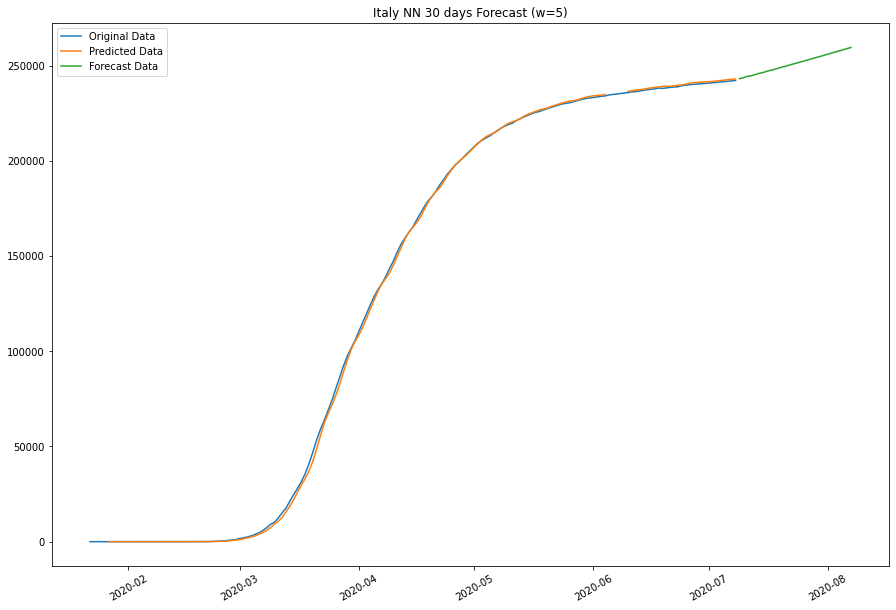

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df3.iloc[0])
plt.plot(df3.iloc[1])
plt.plot(italyNN_forecast30_w3.iloc[1,-forecast_days:])
plt.xticks(rotation=30)
plt.legend('best', labels=["Original Data","Predicted Data", "Forecast Data"])
plt.title("Italy NN 30 days Forecast (w=5)")
plt.show()